## Importing Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and processing DataSet

In [ ]:
df = pd.read_csv('/content/NASA Near-Earth Objects.csv')
df.head()

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [ ]:
df.shape

(24000, 18)

In [ ]:
df.info() #coloumn description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         24000 non-null  int64  
 1   id                                 24000 non-null  int64  
 2   neo_reference_id                   24000 non-null  int64  
 3   name                               24000 non-null  object 
 4   name_limited                       144 non-null    object 
 5   designation                        24000 non-null  object 
 6   absolute_magnitude_h               23992 non-null  float64
 7   is_potentially_hazardous_asteroid  24000 non-null  bool   
 8   is_sentry_object                   24000 non-null  bool   
 9   kilometers_estimated_diameter_min  23992 non-null  float64
 10  kilometers_estimated_diameter_max  23992 non-null  float64
 11  orbit_id                           24000 non-null  obj

In [ ]:
df.isnull() #show null values as False

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
23996,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
23997,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
23998,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #sum of all null in each coloumn

In [ ]:
df.isnull().sum()/df.shape[0]*100 #Percentage of null values

Unnamed: 0                            0.000000
id                                    0.000000
neo_reference_id                      0.000000
name                                  0.000000
name_limited                         99.400000
designation                           0.000000
absolute_magnitude_h                  0.033333
is_potentially_hazardous_asteroid     0.000000
is_sentry_object                      0.000000
kilometers_estimated_diameter_min     0.033333
kilometers_estimated_diameter_max     0.033333
orbit_id                              0.000000
orbit_class_type                      0.000000
perihelion_distance                   0.000000
aphelion_distance                     0.000000
first_observation_date                0.000000
last_observation_date                 0.000000
orbit_class_description               0.000000
dtype: float64

In [ ]:
df.duplicated().sum() #DUPLICATE VALUES

In [ ]:
#Finding Garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())

name
1981 Midas (1973 EA)    1
(2017 HV)               1
(2017 HG1)              1
(2017 HF1)              1
(2017 HC1)              1
                       ..
(2011 CG50)             1
(2011 CF50)             1
(2011 CE50)             1
(2011 CD50)             1
(2020 UU)               1
Name: count, Length: 24000, dtype: int64
name_limited
Midas          1
Baboquivari    1
Izhdubar       1
Sigurd         1
Belenus        1
              ..
Pan            1
Mithra         1
Pocahontas     1
Cleobulus      1
Cernunnos      1
Name: count, Length: 144, dtype: int64
designation
1981         1
2017 HV      1
2017 HG1     1
2017 HF1     1
2017 HC1     1
            ..
2011 CG50    1
2011 CF50    1
2011 CE50    1
2011 CD50    1
2020 UU      1
Name: count, Length: 24000, dtype: int64
orbit_id
7            1485
5            1445
4            1379
8            1352
6            1335
             ... 
321             1
447             1
325             1
251             1
MPO508629       1
Name

In [ ]:
#DESCRIPTIVE STATISTICS
df.describe() # summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

,Unnamed: 0,id,neo_reference_id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,24000.000000,2.400000e+04,2.400000e+04,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,11999.500000,7.275111e+06,7.275111e+06,22.942274,0.167777,0.375160,0.915225,2.653104
std,6928.347566,1.333987e+07,1.333987e+07,2.952871,0.293000,0.655169,0.232201,4.468233
min,0.000000,2.001981e+06,2.001981e+06,12.580000,0.000609,0.001362,0.070431,0.653754
25%,5999.750000,3.409962e+06,3.409962e+06,20.650000,0.024241,0.054205,0.785150,1.706281
50%,11999.500000,3.703790e+06,3.703790e+06,23.200000,0.060891,0.136157,0.965325,2.480109
75%,17999.250000,3.803897e+06,3.803897e+06,25.200000,0.197040,0.440595,1.068984,3.397965
max,23999.000000,5.408749e+07,5.408749e+07,33.200000,8.101305,18.115068,1.299988,631.895456


In [ ]:
numeric_df = df.select_dtypes(include='number')

## HeatMaping

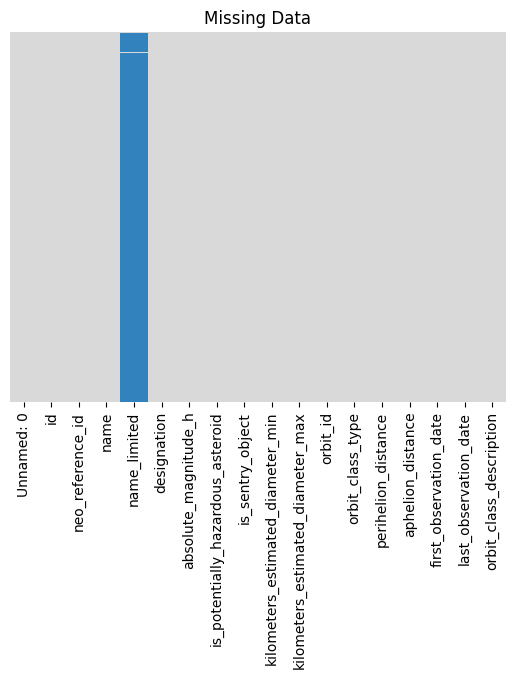

In [ ]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap="tab20c_r")
plt.title("Missing Data")
plt.show()

In [ ]:
df.drop("name_limited", axis=1, inplace= True)

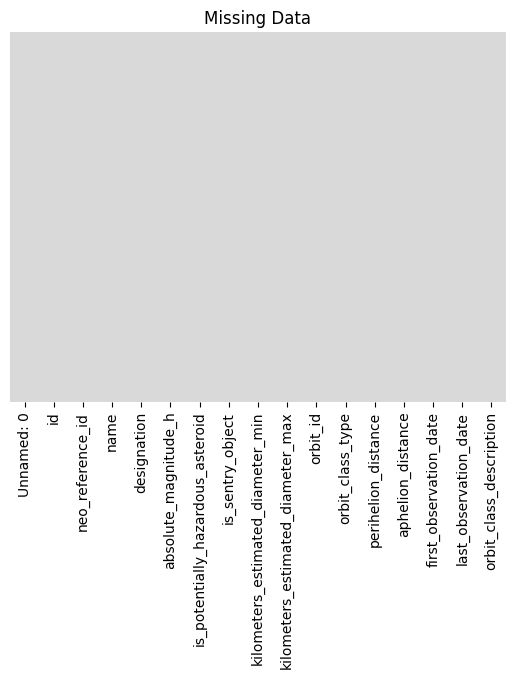

In [ ]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap="tab20c_r")
plt.title("Missing Data")
plt.show()

## Finding Corelation

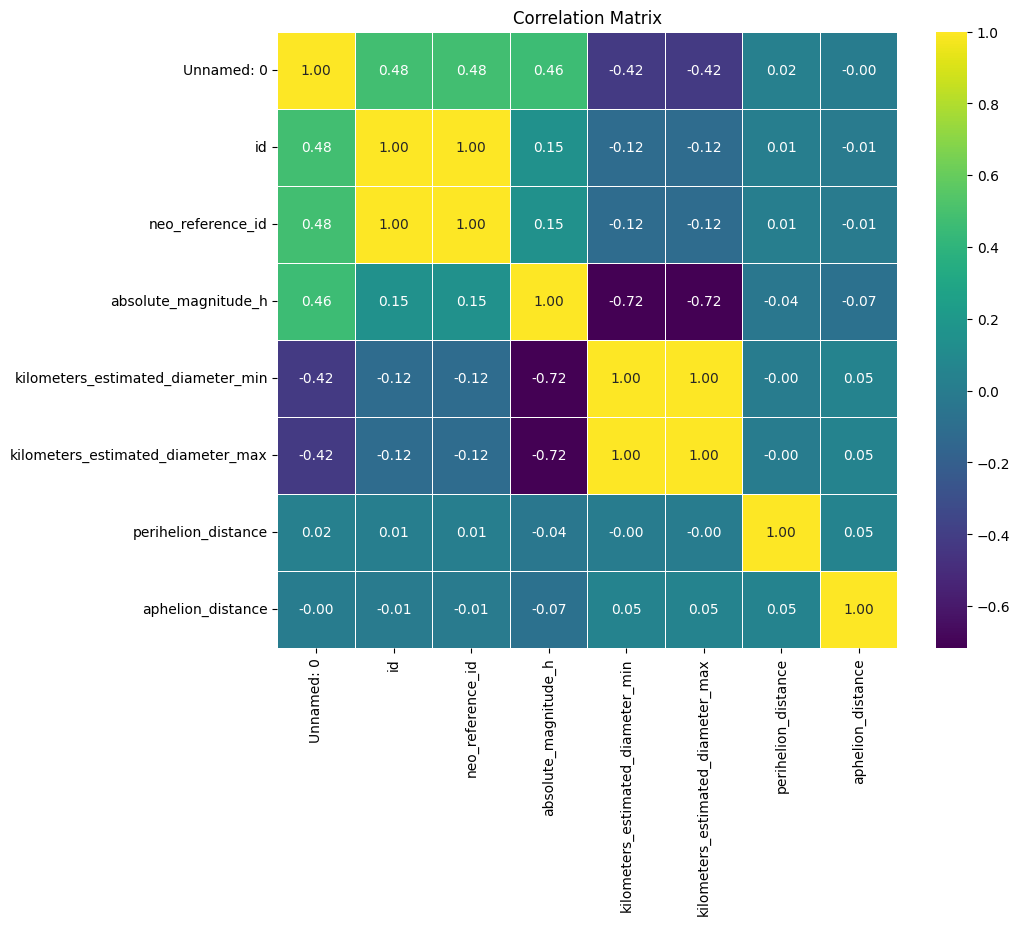

In [ ]:
#For only numeric corelation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.dropna(inplace= True)

## Visual Analysis

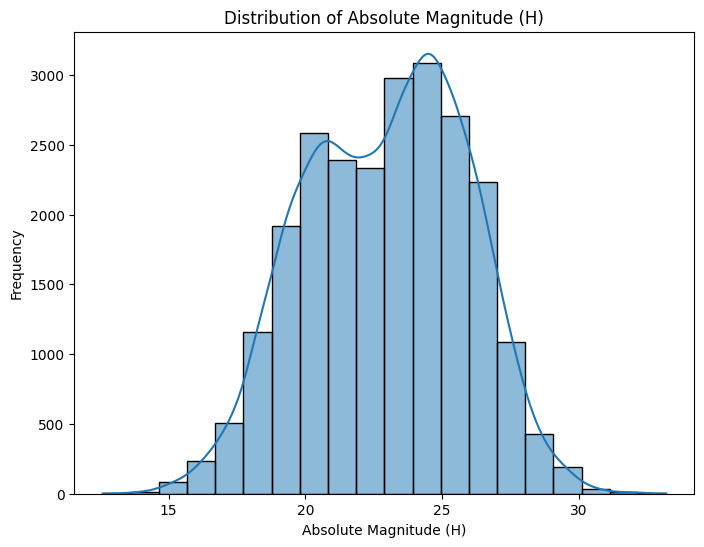

In [ ]:
# histogram of absolute_magnitude_h
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='absolute_magnitude_h', bins=20, kde=True)
plt.title('Distribution of Absolute Magnitude (H)')
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Frequency')
plt.show()

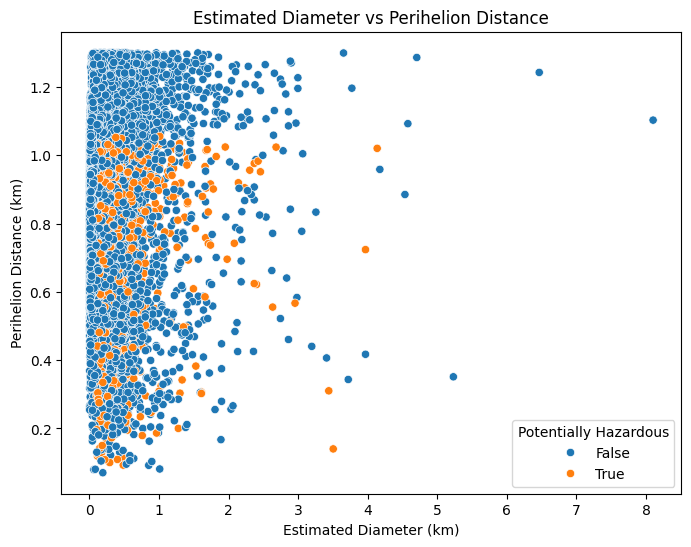

In [ ]:
# Plot scatter plot of estimated diameter vs perihelion distance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='kilometers_estimated_diameter_min', y='perihelion_distance', hue='is_potentially_hazardous_asteroid')
plt.title('Estimated Diameter vs Perihelion Distance')
plt.xlabel('Estimated Diameter (km)')
plt.ylabel('Perihelion Distance (km)')
plt.legend(title='Potentially Hazardous')
plt.show()

## Developing Model

In [ ]:
# Select features and target variable
features = ['absolute_magnitude_h', 'kilometers_estimated_diameter_min', 'kilometers_estimated_diameter_max', 'perihelion_distance', 'aphelion_distance']
target = 'is_potentially_hazardous_asteroid'

In [ ]:
# Split the data into features and target variable again
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

## Results

In [ ]:
# For Danger Prediction

# Filtering potentially hazardous NEOs
potentially_hazardous_neos = df[df['is_potentially_hazardous_asteroid'] == 1]

# Use only necessary features for prediction
prediction_features = potentially_hazardous_neos[features]

# Make predictions for potentially hazardous NEOs
hazardous_predictions = rf_classifier.predict(prediction_features)

# Displaying predictions for potentially hazardous NEOs
for i, (index, neo) in enumerate(potentially_hazardous_neos.iterrows()):
    neo_name = neo['name']
    first_obs_date = neo['first_observation_date']
    last_obs_date = neo['last_observation_date']
    orbit_class_desc = neo['orbit_class_description']

    print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(f"Prediction for NEO '{neo_name}': {'Potentially Hazardous' if hazardous_predictions[i] else 'Not Potentially Hazardous'}")
    print(f"Features:")
    print(f"  - First Observation Date: {first_obs_date}")
    print(f"  - Last Observation Date: {last_obs_date}")
    print(f"  - Orbit Class Description: {orbit_class_desc}")
    print(f"  - Other Features:")
    print(prediction_features.iloc[i])
    print()

Streaming output truncated to the last 5000 lines.
kilometers_estimated_diameter_max     0.714562
perihelion_distance                   0.172870
aphelion_distance                     2.260719
Name: 8573, dtype: float64

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
Prediction for NEO '(2011 WN46)': Potentially Hazardous
Features:
  - First Observation Date: 2011-11-27
  - Last Observation Date: 2011-12-07
  - Orbit Class Description: Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo
  - Other Features:
absolute_magnitude_h                 21.100000
kilometers_estimated_diameter_min     0.160160
kilometers_estimated_diameter_max     0.358129
perihelion_distance                   0.670818
aphelion_distance                     1.620694
Name: 8588, dtype: float64

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [ ]:
# Predictions for all objects in the dataset
all_predictions = rf_classifier.predict(X)

# Displaying information about each object
for i, (index, row) in enumerate(df.iterrows()):
    name = row['name']
    distance = (row['perihelion_distance'] + row['aphelion_distance']) / 2  # Average distance
    future_risk = "Potentially Hazardous" if all_predictions[i] else "Not Potentially Hazardous"

    print(f"Object Name: {name}")
    print(f"Average Distance from Earth: {distance} AU")
    print(f"Future Risk Prediction: {future_risk}\n")

Streaming output truncated to the last 5000 lines.
Object Name: (2020 JQ1)
Average Distance from Earth: 0.772282903919252 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JR1)
Average Distance from Earth: 1.2003715325863025 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JS1)
Average Distance from Earth: 1.531610381185625 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JT1)
Average Distance from Earth: 1.3036146588672315 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JU1)
Average Distance from Earth: 1.482344519674485 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JV1)
Average Distance from Earth: 1.1883684962061545 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JW1)
Average Distance from Earth: 1.687881644975183 AU
Future Risk Prediction: Not Potentially Hazardous

Object Name: (2020 JX1)
Average Distance from Earth: 1.429960511345402 

In [ ]:
from itertools import combinations

In [ ]:
# Function to estimate collision probability between two objects
def estimate_collision_probability(obj1, obj2):
    # Extract features for both objects and reshape them to 2D arrays
    features_obj1 = obj1[features].values.reshape(1, -1)
    features_obj2 = obj2[features].values.reshape(1, -1)

    # Using the trained classifier to predict collision probability
    collision_prob_obj1 = rf_classifier.predict_proba(features_obj1)[:, 1]
    collision_prob_obj2 = rf_classifier.predict_proba(features_obj2)[:, 1]

    # Average collision probability between the two objects
    avg_collision_prob = (collision_prob_obj1 + collision_prob_obj2) / 2

    return avg_collision_prob

    # Predict collisions for each pair of objects
for i, obj1 in df.iterrows():
    for j, obj2 in df.iterrows():
        if i != j:  # Avoid comparing the object with itself
            collision_probability = estimate_collision_probability(obj1, obj2)
            print(f"Collision probability between {obj1['name']} and {obj2['name']}: {collision_probability}")
            if collision_probability > 0.5:  # Adjust threshold as needed
                print(f"Objects '{obj1['name']}' and '{obj2['name']}' have a high probability of collision.")

## Evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9045236606212216
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      4374
        True       0.44      0.29      0.35       423

    accuracy                           0.90      4797
   macro avg       0.69      0.63      0.65      4797
weighted avg       0.89      0.90      0.90      4797

Confusion Matrix:
[[4215  159]
 [ 299  124]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9045236606212216


## SELF DATA INPUT PREDICTIONS

In [ ]:
from flask import Flask, render_template_string

app = Flask(__name__)

@app.route('/')
def index():
    # Read the HTML file
    with open('index.html', 'r') as file:
        html_content = file.read()
    return render_template_string(html_content)

if __name__ == '__main__':
    app.run(port=5000)


# GUI

In [ ]:
import tkinter as tk

In [ ]:

def predict_neo():
    abs_mag = abs_mag_entry.get()
    min_diameter = min_diameter_entry.get()
    max_diameter = max_diameter_entry.get()
    perihelion = perihelion_entry.get()
    aphelion = aphelion_entry.get()

    # Add your prediction logic here
    prediction_result.config(text="Prediction result will be displayed here...")

# Create main window
root = tk.Tk()
root.title("NEO Prediction")

# Create input fields
abs_mag_label = tk.Label(root, text="Absolute Magnitude (H):")
abs_mag_label.grid(row=0, column=0, padx=10, pady=5, sticky="w")
abs_mag_entry = tk.Entry(root)
abs_mag_entry.grid(row=0, column=1, padx=10, pady=5)

min_diameter_label = tk.Label(root, text="Estimated Diameter (km) - Min:")
min_diameter_label.grid(row=1, column=0, padx=10, pady=5, sticky="w")
min_diameter_entry = tk.Entry(root)
min_diameter_entry.grid(row=1, column=1, padx=10, pady=5)

max_diameter_label = tk.Label(root, text="Estimated Diameter (km) - Max:")
max_diameter_label.grid(row=2, column=0, padx=10, pady=5, sticky="w")
max_diameter_entry = tk.Entry(root)
max_diameter_entry.grid(row=2, column=1, padx=10, pady=5)

perihelion_label = tk.Label(root, text="Perihelion Distance (AU):")
perihelion_label.grid(row=3, column=0, padx=10, pady=5, sticky="w")
perihelion_entry = tk.Entry(root)
perihelion_entry.grid(row=3, column=1, padx=10, pady=5)

aphelion_label = tk.Label(root, text="Aphelion Distance (AU):")
aphelion_label.grid(row=4, column=0, padx=10, pady=5, sticky="w")
aphelion_entry = tk.Entry(root)
aphelion_entry.grid(row=4, column=1, padx=10, pady=5)

# Create predict button
predict_button = tk.Button(root, text="Predict", command=predict_neo)
predict_button.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

# Create prediction result label
prediction_result = tk.Label(root, text="")
prediction_result.grid(row=6, column=0, columnspan=2, padx=10, pady=5)

# Run the application
root.mainloop()
